In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Ans 2

data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# Rename the columns
df=data.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)


In [6]:
df

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [7]:
df[df.duplicated()] # No duplicated data


,RnD,admin,marketing,state,profit


In [8]:
# Checking missing value
df.isnull().sum()

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [9]:
df[df.values==0.0]


,RnD,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [10]:
df.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
df.corr()

,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


<Axes: ylabel='state'>

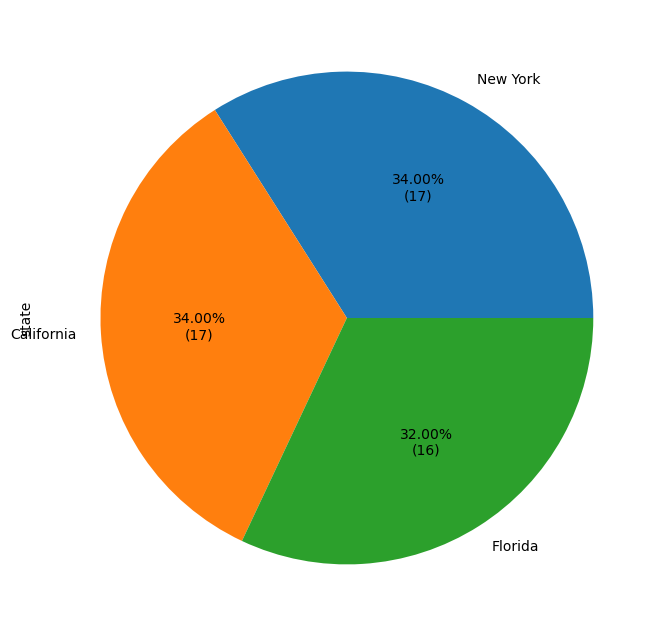

In [12]:
plt.figure(figsize=(8,8))
df['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df['state'].value_counts().sum())))


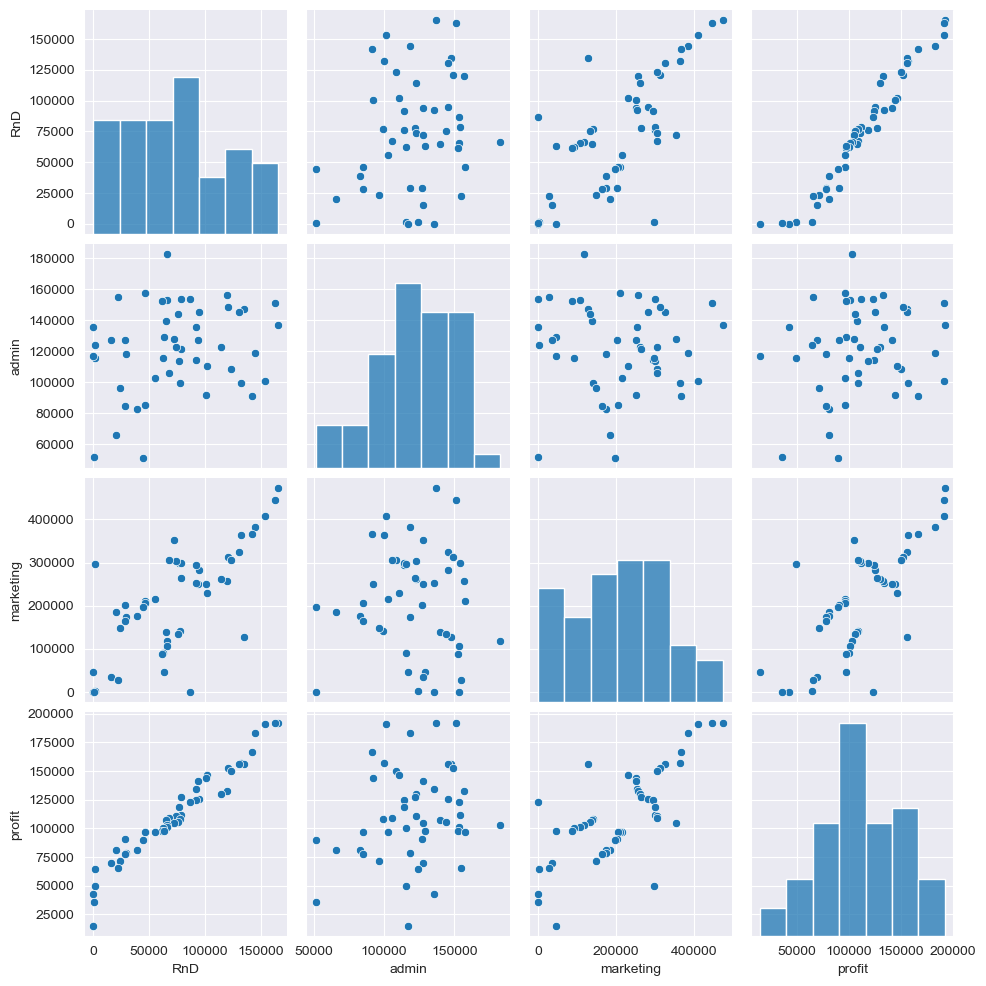

In [13]:
#Plotting Correlation on a Pair Plot
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [14]:
#Model Building
model=smf.ols("profit~RnD+admin+marketing",data=df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           4.53e-30
Time:                        22:26:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

In [17]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RnD          17.846374
 admin        -0.525507
 marketing     1.655077
 dtype: float64,
 Intercept    0.00000
 RnD          0.00000
 admin        0.60176
 marketing    0.10472
 dtype: float64)

In [18]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [19]:
slr_a = smf.ols("profit~marketing", data = df).fit()
slr_a.tvalues , slr_a.pvalues  # marketing has in-significant pvalue



(Intercept    7.808356
 marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 marketing    4.381073e-10
 dtype: float64)

In [20]:
slr_m=smf.ols("profit~admin",data=df).fit()
slr_m.tvalues , slr_m.pvalues  # admin has significant pvalue

(Intercept    3.040044
 admin        1.419493
 dtype: float64,
 Intercept    0.003824
 admin        0.162217
 dtype: float64)

In [42]:
final_model=smf.ols("profit~marketing+admin",data=df).fit()
final_model.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 marketing    8.281039
 admin        2.467779
 dtype: float64,
 Intercept    2.589341e-01
 marketing    9.727245e-11
 admin        1.729198e-02
 dtype: float64)

In [43]:
# Model Validation
#Two Techniques: 1. Collinearity Check & 2. Residual Analysis
# 1) Collinearity Problem Check


from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.026406
0,marketing,7.593984
2,RnD,8.384571


In [44]:
# None of the variables has VIF>20, No Collinearity, but we cannot consider all varaibles in Regression equation


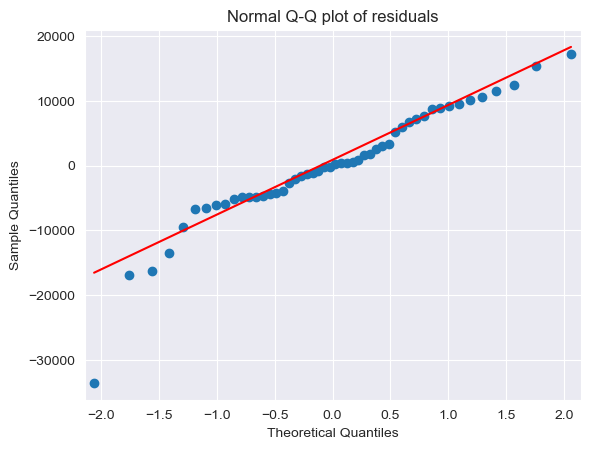

In [45]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)


import statsmodels.api as sm

sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()
     


In [29]:
list(np.where(model.resid<-30000))


[array([49], dtype=int64)]

In [30]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma


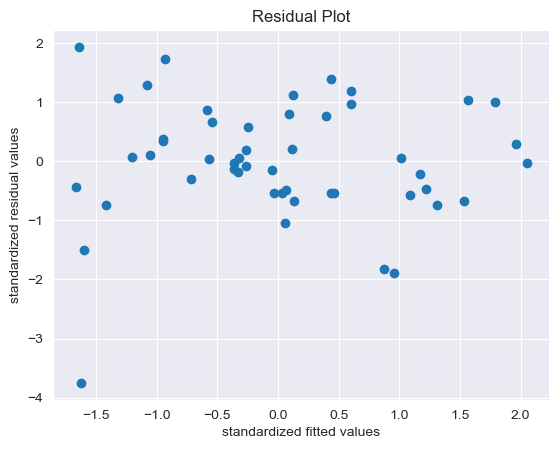

In [31]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable


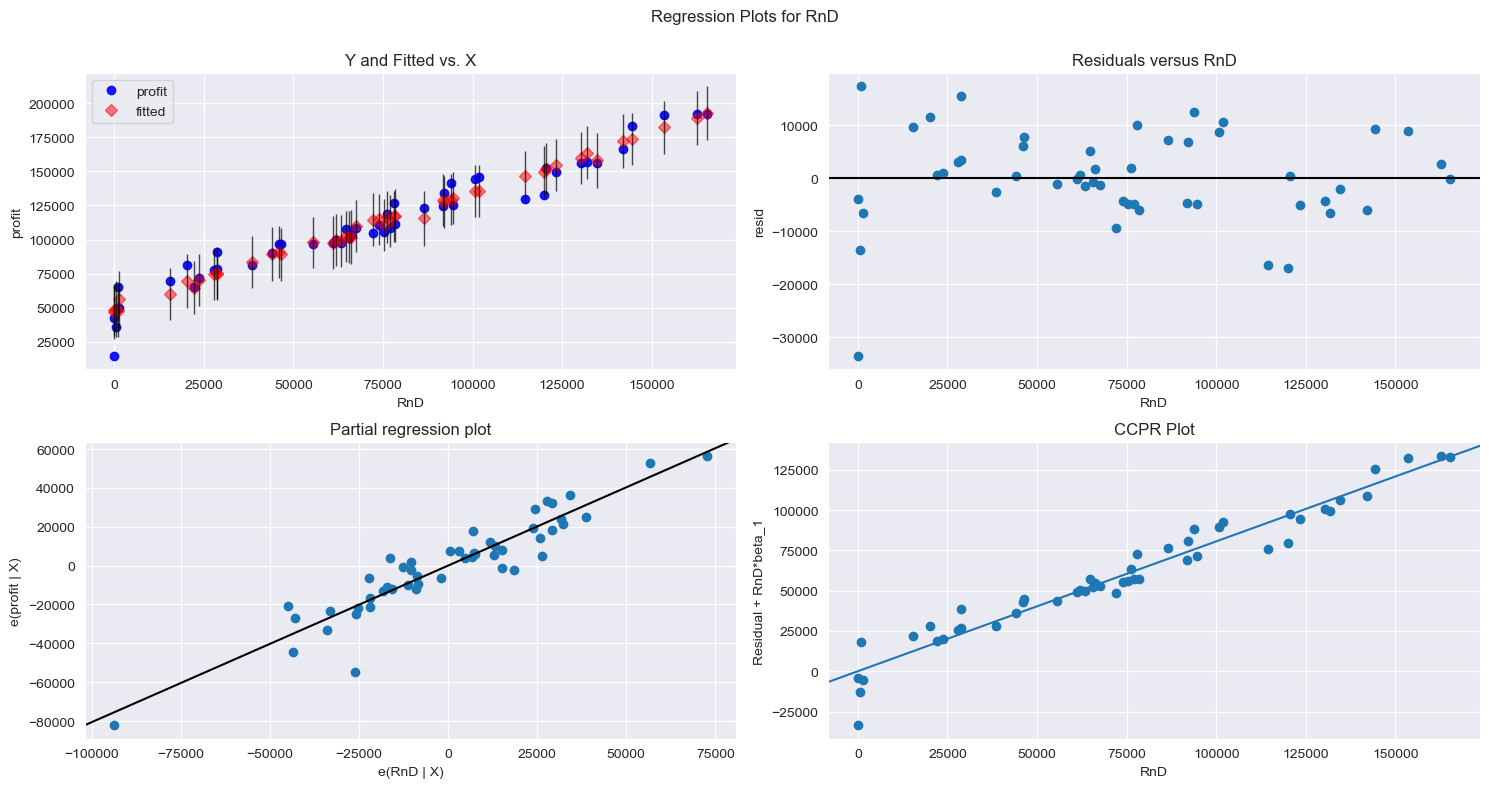

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RnD',fig=fig)
plt.show()

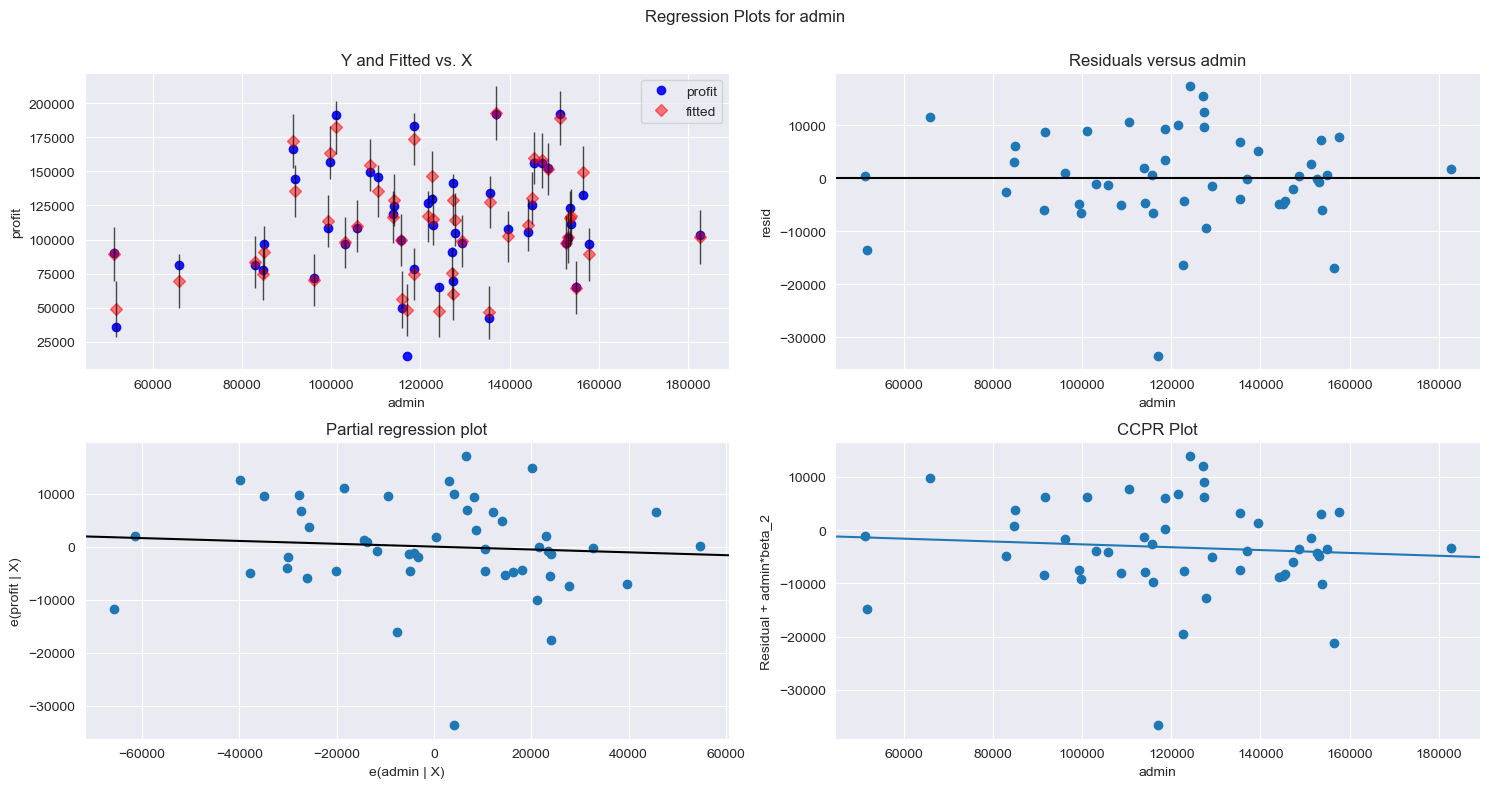

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'admin',fig=fig)
plt.show()

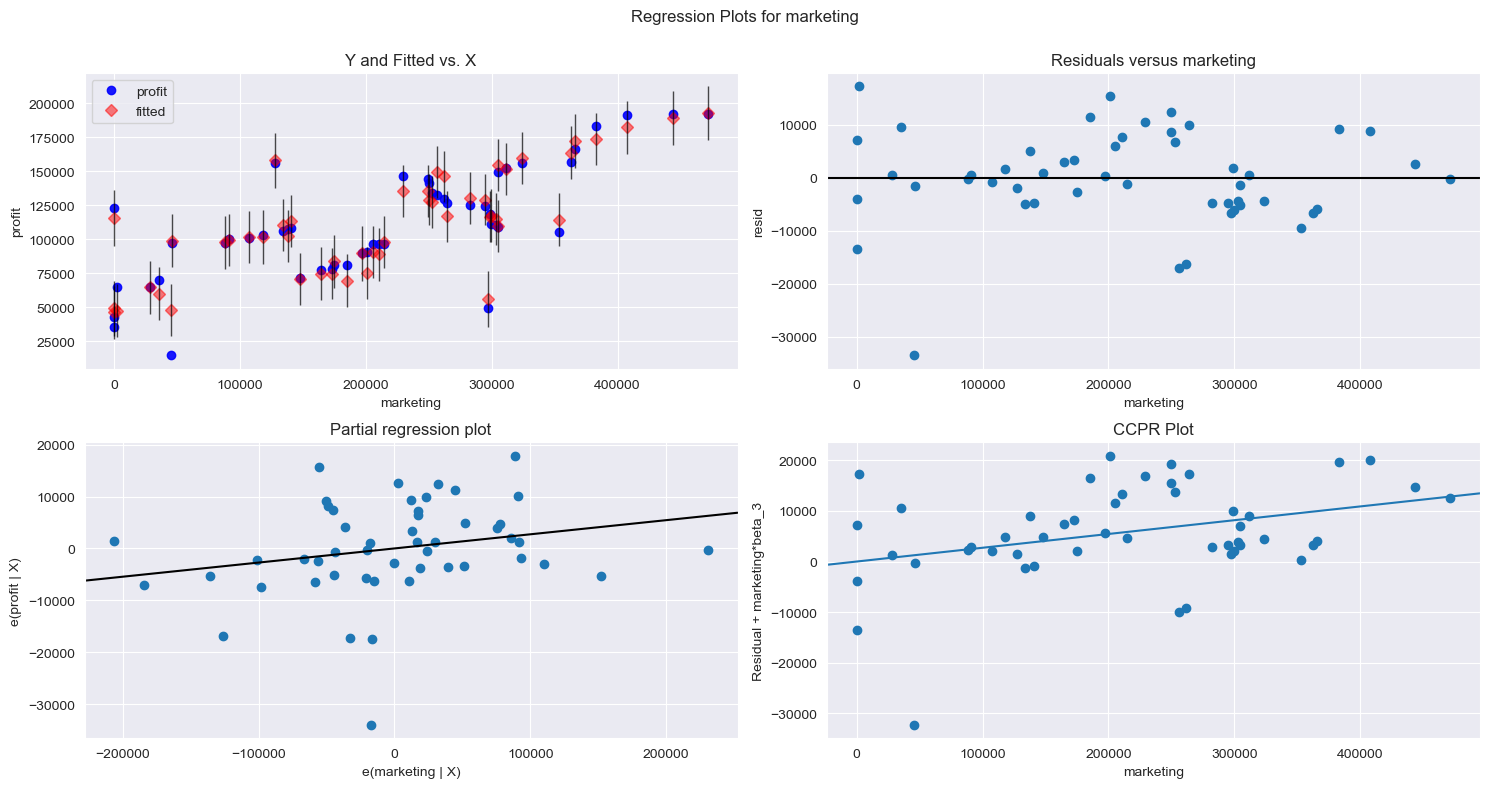

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'marketing',fig=fig)
plt.show()

In [46]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
# By using Cook's Distance

influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance
c, p_value

(array([8.39838700e-03, 1.14873969e-02, 6.56987381e-02, 2.88908332e-02,
        2.79709140e-02, 7.16804815e-03, 8.13809711e-02, 1.85241010e-03,
        1.22027331e-03, 6.61733180e-03, 1.35247093e-02, 2.53489557e-02,
        3.94174194e-03, 8.02036367e-04, 1.42016284e-04, 2.95081144e-04,
        3.35884284e-05, 3.42132384e-03, 6.54885653e-04, 1.85078551e-01,
        2.84861879e-03, 3.73520912e-02, 1.07497235e-02, 9.56175936e-03,
        9.85963822e-03, 1.13174355e-03, 6.78641890e-04, 5.41616669e-02,
        2.51507334e-03, 7.15285794e-04, 8.58305042e-03, 1.29034322e-03,
        1.89459286e-02, 1.59981468e-03, 2.23714369e-02, 1.78833318e-04,
        4.72063572e-03, 1.73121433e-03, 2.62609290e-03, 3.20831672e-03,
        6.39845206e-03, 3.86442369e-03, 6.51113096e-03, 1.04035178e-05,
        8.39238900e-03, 7.75857331e-04, 1.11357048e-01, 2.36146516e-02,
        2.91586816e-04, 9.90987637e-02]),
 array([0.99892814, 0.99829039, 0.97778965, 0.99329343, 0.99360559,
        0.99915383, 0.9698

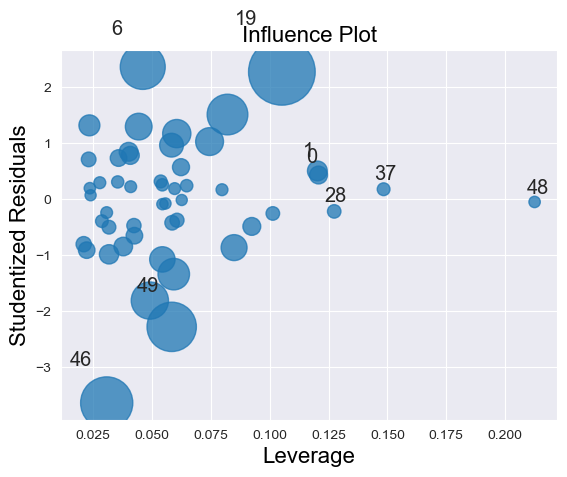

In [47]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(final_model)
plt.show()

In [38]:
#Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.36


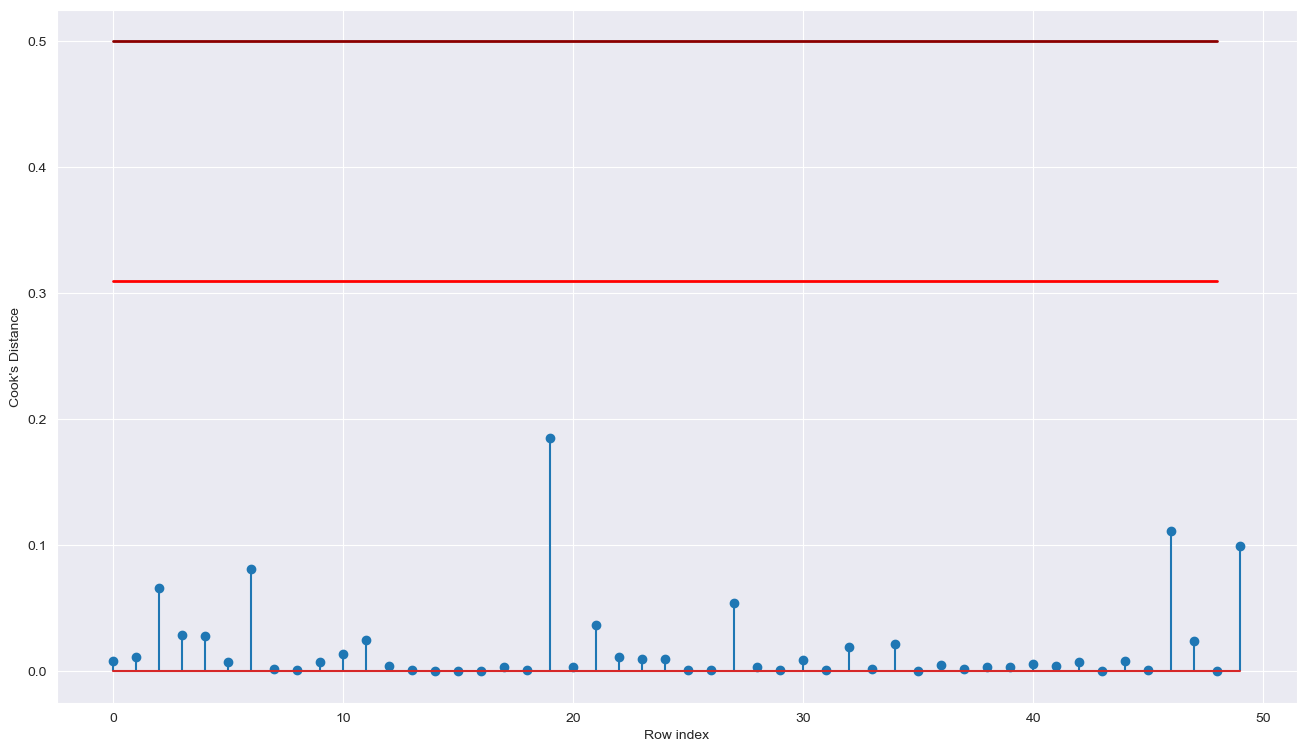

In [41]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [49]:
# Improving the model

#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df.copy()
df
     

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [50]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
#Model Deletion Diagoniostics & Final Model
Final_Model = smf.ols('profit~RnD+admin+marketing',data=df1).fit()


In [53]:
Final_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           8.85e-32
Time:                        22:58:21   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Model Predictions
#New data for prediction
new_data=pd.DataFrame({'RnD':78000,'admin':127864.55,"marketing":249839.44},index=[1])
new_data

,RnD,admin,marketing
1,78000,127864.55,249839.44


In [55]:
# Manual prediction
Final_Model.predict(new_data)

1    116922.172202
dtype: float64

In [56]:
#Automatic Prediction 
pred_y = Final_Model.predict(df1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [63]:
# table containing R^2 value for each prepared model

Prepared_Models=pd.DataFrame(['Model','Final_Model'])
new_data

,RnD,marketing
0,0.0,45173.06


In [64]:
df1={'Prepared_models':['Model','Final_Model'],'Rsquared':[model.rsquared,Final_Model.rsquared]}
table=pd.DataFrame(df1)
table
     

,Prepared_models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
